In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder



In [ ]:
wine=pd.read_csv("WineQuality.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


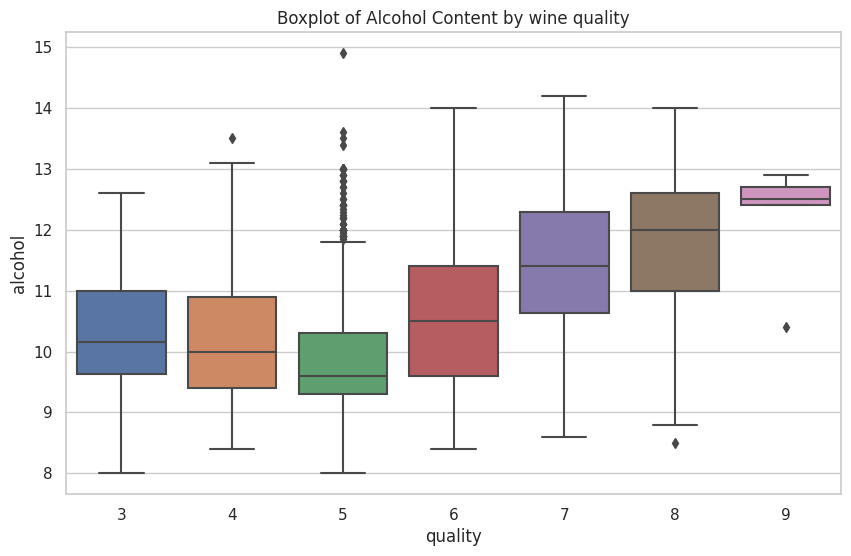

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(x='quality', y='alcohol', data=wine)
plt.title('Boxplot of Alcohol Content by wine quality')
plt.show()

In [ ]:
missing_values_count = wine.isnull().sum()
print(missing_values_count)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


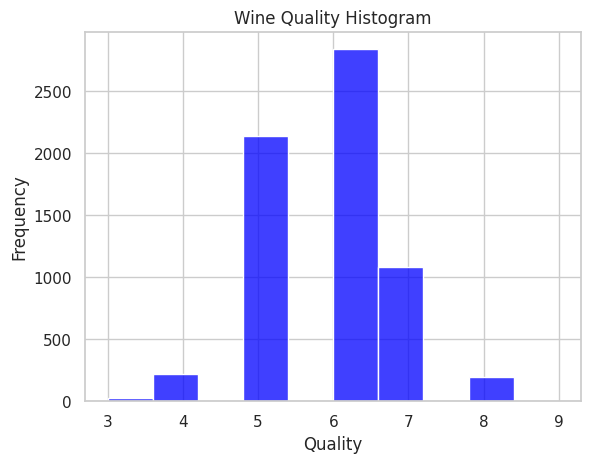

In [ ]:
sns.histplot(wine['quality'], bins=10, kde=False, color='blue')
plt.title('Wine Quality Histogram')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()


In [ ]:
str(wine)

'       type  fixed acidity  volatile acidity  citric acid  residual sugar  \\\n0     white            7.0             0.270         0.36            20.7   \n1     white            6.3             0.300         0.34             1.6   \n2     white            8.1             0.280         0.40             6.9   \n3     white            7.2             0.230         0.32             8.5   \n4     white            7.2             0.230         0.32             8.5   \n...     ...            ...               ...          ...             ...   \n6492    red            6.2             0.600         0.08             2.0   \n6493    red            5.9             0.550         0.10             2.2   \n6494    red            6.3             0.510         0.13             2.3   \n6495    red            5.9             0.645         0.12             2.0   \n6496    red            6.0             0.310         0.47             3.6   \n\n      chlorides  free sulfur dioxide  total sulfur dioxide  

In [ ]:
le = LabelEncoder()
wine['quality_encoded'] = le.fit_transform(wine['quality'])



In [ ]:
X = wine.drop(['quality', 'quality_encoded'], axis=1)
y = wine['quality_encoded']



In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [ ]:
# One-hot encode categorical variables (e.g., 'type')
X_encoded = pd.get_dummies(X, columns=['type'], drop_first=True)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a decision tree model
model = DecisionTreeClassifier(random_state=42)


In [ ]:
model.fit(X_train, y_train)

ValueError: ignored